In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
import cv2
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
# from tensorflow.keras.utils import np_utils
from tensorflow.python.keras.utils.np_utils import to_categorical
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# path to images
path = "D:/wangyanning/biggeodata/data/data/"
# animal categories
categories = ['debris', 'forest', 'water']

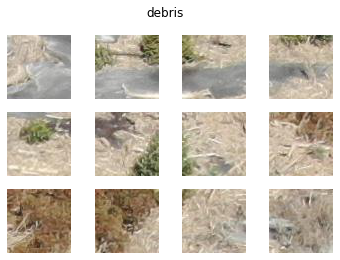

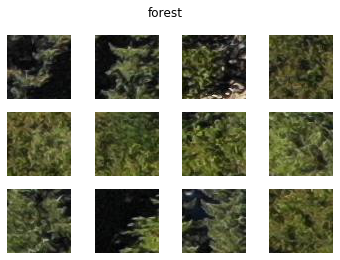

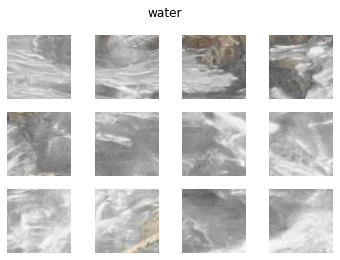

In [3]:
# Iterate through a list of categories
for category in categories:
    # Create a 3x4 grid of subplots for each category
    fig, _ = plt.subplots(3, 4)
    # Set the title of the figure to the current category
    fig.suptitle(category)
    
    # Iterate through the first 12 files in the directory for the current category
    for k, v in enumerate(os.listdir(path+category)[:12]):
        # Load the image file into a NumPy array
        img = plt.imread(path+category+'/'+v)
        # Plot the current image in the grid of subplots
        plt.subplot(3, 4, k+1)
        # Remove the axis labels from the plot
        plt.axis('off')
        # Display the image in the plot
        plt.imshow(img)
    
    # Show the plot for the current category
    plt.show()


In [4]:
# Create two empty lists to store the height and width of the images
shape0 = []
shape1 = []

# Iterate through each category in the list of categories
for category in categories:
    # Iterate through each file in the directory for the current category
    for files in os.listdir(path+category):
        # Load the image file into a NumPy array and get its shape
        shape0.append(plt.imread(path+category+'/'+ files).shape[0])
        shape1.append(plt.imread(path+category+'/'+ files).shape[1])
        
    # Print the minimum and maximum height and width for the images in the current category
    print(category, ' => height min : ', min(shape0), 'width min : ', min(shape1))
    print(category, ' => height max : ', max(shape0), 'width max : ', max(shape1))
    
    # Reset the lists of image heights and widths
    shape0 = []
    shape1 = []


debris  => height min :  64 width min :  64
debris  => height max :  64 width max :  64
forest  => height min :  64 width min :  64
forest  => height max :  64 width max :  64
water  => height min :  64 width min :  64
water  => height max :  64 width max :  64


In [6]:
# Create empty lists to store image data, labels, and image file paths
data = []
labels = []
imagePaths = []

# Set the desired height, width, and number of color channels for the images
HEIGHT = 64
WIDTH = 64
N_CHANNELS = 3

# Iterate through each category in the list of categories
for k, category in enumerate(categories):
    # Iterate through each file in the directory for the current category
    for f in os.listdir(path+category):
        # Add the file path and corresponding label to the list of image file paths
        imagePaths.append([path+category+'/'+f, k]) # k=0 : 'debris', k=1 : 'forest', k=2 : 'water'
        
import random
random.shuffle(imagePaths)

# Print the first 10 elements of the shuffled list of image file paths
print(imagePaths[:10])

# Iterate through each image file path in the shuffled list
for imagePath in imagePaths:
    # Load the image file into a NumPy array using OpenCV
    image = cv2.imread(imagePath[0])
    # Resize the image to the desired height and width using OpenCV
    image = cv2.resize(image, (WIDTH, HEIGHT))  
    # Add the image data to the list of image data
    data.append(image)
    # Get the label for the current image from the image file path
    label = imagePath[1]
    # Add the label to the list of labels
    labels.append(label)


[['D:/wangyanning/biggeodata/data/data/water/DJI_0682_512_832.JPG', 2], ['D:/wangyanning/biggeodata/data/data/water/DJI_0682_1728_3072.JPG', 2], ['D:/wangyanning/biggeodata/data/data/debris/DJI_0682_1408_512.JPG', 0], ['D:/wangyanning/biggeodata/data/data/water/DJI_0682_640_3520.JPG', 2], ['D:/wangyanning/biggeodata/data/data/debris/DJI_0682_1984_576.JPG', 0], ['D:/wangyanning/biggeodata/data/data/forest/DJI_0684_1216_2944.JPG', 1], ['D:/wangyanning/biggeodata/data/data/forest/DJI_0684_256_3712.JPG', 1], ['D:/wangyanning/biggeodata/data/data/debris/DJI_0684_1344_512.JPG', 0], ['D:/wangyanning/biggeodata/data/data/forest/DJI_0684_1792_3968.JPG', 1], ['D:/wangyanning/biggeodata/data/data/forest/DJI_0684_640_3456.JPG', 1]]


In [7]:
# Convert the list of image data to a NumPy array and scale the pixel values to the range [0, 1]
data = np.array(data, dtype="float") / 255.0

# Convert the list of labels to a NumPy array
labels = np.array(labels)


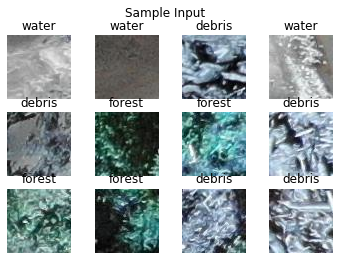

In [8]:
# Create a figure with a 3x4 grid of subplots
fig, _ = plt.subplots(3, 4)

# Add a title to the figure
fig.suptitle("Sample Input")

# Set the background color of the figure to white
fig.patch.set_facecolor('xkcd:white')

# Loop over the first 12 images in the data array
for i in range(12):
    # Add a subplot to the figure and set the current subplot to it
    plt.subplot(3, 4, i+1)

    # Show the i-th image in the data array
    plt.imshow(data[i])

    # Turn off the axis labels for the current subplot
    plt.axis('off')

    # Add a title to the current subplot that shows the category of the i-th image
    plt.title(categories[labels[i]])

# Display the figure
plt.show()


In [26]:
# Split the data and labels into training and testing sets using the train_test_split function from the sklearn.model_selection module
# The test set size is 20% of the total dataset, and the random state is set to 42 for reproducibility
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2, random_state=42)


In [27]:
# Convert the training labels to categorical format using the to_categorical function from the keras.utils module
trainY = to_categorical(trainY, 3)

# Print the shapes of the training and testing data and labels arrays
print(trainX.shape)  # shape of training data array
print(testX.shape)   # shape of testing data array
print(trainY.shape)  # shape of training labels array
print(testY.shape)   # shape of testing labels array


(2019, 64, 64, 3)
(505, 64, 64, 3)
(2019, 3)
(505,)


In [28]:

model = Sequential()
#creates a sequential model, where layers are added sequentially to the model.
model.add(Convolution2D(32, (2, 2), activation='relu', input_shape=(HEIGHT, WIDTH, N_CHANNELS)))
#adds a 2D convolutional layer with 32 filters of size (2, 2), a ReLU activation function, and an input shape of (HEIGHT, WIDTH, N_CHANNELS).
model.add(MaxPooling2D(pool_size=(2, 2)))
#adds a max pooling layer with a pool size of (2, 2).
model.add(Convolution2D(32, (2, 2), activation='relu'))
#adds another 2D convolutional layer with 32 filters of size (2, 2) and a ReLU activation function.
model.add(MaxPooling2D(pool_size=(2, 2)))
#adds another max pooling layer with a pool size of (2, 2).
model.add(Dropout(0.25))
#adds a dropout layer that randomly drops out 25% of the neurons in the previous layer during each training epoch to reduce overfitting.
model.add(Flatten())
#adds a flatten layer that flattens the output of the previous layer into a 1D vector.
model.add(Dense(128, activation='relu'))
#adds a dense (fully connected) layer with 128 neurons and a ReLU activation function.
model.add(Dropout(0.5))
#adds another dropout layer that randomly drops out 50% of the neurons in the previous layer during each training epoch to reduce overfitting.
model.add(Dense(3, activation='softmax'))
#adds a dense layer with 3 neurons (one for each class) and a softmax activation function, which outputs a probability distribution over the classes.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#compiles the model with the categorical cross-entropy loss function, the Adam optimizer, and the accuracy metric.
print(model.summary())
#prints a summary of the model to the console, including the output shape of each layer and the number of trainable parameters.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 63, 63, 32)        416       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 30, 30, 32)        4128      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 7200)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

In [29]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Define a ModelCheckpoint callback to save the best weights during training
# The monitor parameter specifies the quantity to monitor for saving the weights, i.e. validation accuracy
# The verbose parameter specifies the level of logging output
# The save_best_only parameter specifies to save only the best weights based on the monitored quantity
# The save_weights_only parameter specifies to save only the weights and not the entire model
# The mode parameter specifies the criterion for determining the best weights, i.e. auto selects based on the monitored quantity
# The save_freq parameter specifies how often to save the weights, i.e. after each epoch
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', save_freq=1)

# Define an EarlyStopping callback to stop training when the monitored quantity stops improving
# The monitor parameter specifies the quantity to monitor for stopping the training, i.e. validation accuracy
# The min_delta parameter specifies the minimum change in the monitored quantity to be considered an improvement
# The patience parameter specifies the number of epochs with no improvement after which to stop training
# The verbose parameter specifies the level of logging output
# The mode parameter specifies the direction of improvement to be considered, i.e. auto selects based on the monitored quantity
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')


In [30]:
# Train the deep learning model using the fit() method of Keras
# The training data and labels are passed as the first two arguments
# The batch size and number of epochs are specified next
# The verbose argument controls the level of logging during training
# The callbacks argument is a list of callbacks to apply during training
# In this case, the ModelCheckpoint and EarlyStopping callbacks are passed
# The history object returned by fit() is saved to the variable hist
hist = model.fit(trainX, trainY, batch_size=32, epochs=25, verbose=1,callbacks=[checkpoint,early])

Train on 2019 samples
Epoch 1/25
1856/2019 [==========================>...] - ETA: 0s - loss: 0.5359 - accuracy: 0.7705WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


2019/2019 [==============================] - 4s 2ms/sample - loss: 0.5151 - accuracy: 0.7811
Epoch 2/25
1824/2019 [==========================>...] - ETA: 0s - loss: 0.1726 - accuracy: 0.9446WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


2019/2019 [==============================] - 3s 1ms/sample - loss: 0.1826 - accuracy: 0.9406
Epoch 3/25
1824/2019 [==========================>...] - ETA: 0s - loss: 0.1078 - accuracy: 0.9627WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


2019/2019 [==============================] - 3s 1ms/sample - loss: 0.1072 - accuracy: 0.9633
Epoch 4/25
1760/2019 [=========================>....] - ETA: 0s - loss: 0.0844 - accuracy: 0.9699WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


2019/2019 [==============================] - 3s 1ms/sample - loss: 0.0822 - accuracy: 0.9708
Epoch 5/25
1760/2019 [=========================>....] - ETA: 0s - loss: 0.0623 - accuracy: 0.9830WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


2019/2019 [==============================] - 3s 1ms/sample - loss: 0.0582 - accuracy: 0.9837
Epoch 6/25
1696/2019 [========================>.....] - ETA: 0s - loss: 0.0585 - accuracy: 0.9805WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


2019/2019 [==============================] - 3s 1ms/sample - loss: 0.0618 - accuracy: 0.9797
Epoch 7/25
1696/2019 [========================>.....] - ETA: 0s - loss: 0.0333 - accuracy: 0.9906WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


2019/2019 [==============================] - 3s 1ms/sample - loss: 0.0497 - accuracy: 0.9856
Epoch 8/25
1664/2019 [=======================>......] - ETA: 0s - loss: 0.1260 - accuracy: 0.9615WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


2019/2019 [==============================] - 3s 1ms/sample - loss: 0.1262 - accuracy: 0.9594
Epoch 9/25
1632/2019 [=======================>......] - ETA: 0s - loss: 0.0506 - accuracy: 0.9847WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


2019/2019 [==============================] - 3s 1ms/sample - loss: 0.0486 - accuracy: 0.9856
Epoch 10/25
1632/2019 [=======================>......] - ETA: 0s - loss: 0.0454 - accuracy: 0.9865WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


2019/2019 [==============================] - 2s 1ms/sample - loss: 0.0457 - accuracy: 0.9871
Epoch 11/25
1568/2019 [======================>.......] - ETA: 0s - loss: 0.0316 - accuracy: 0.9860WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


2019/2019 [==============================] - 3s 1ms/sample - loss: 0.0395 - accuracy: 0.9846
Epoch 12/25
1568/2019 [======================>.......] - ETA: 0s - loss: 0.0842 - accuracy: 0.9751WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


2019/2019 [==============================] - 3s 1ms/sample - loss: 0.0763 - accuracy: 0.9772
Epoch 13/25
1504/2019 [=====================>........] - ETA: 0s - loss: 0.0438 - accuracy: 0.9880WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


2019/2019 [==============================] - 3s 1ms/sample - loss: 0.0355 - accuracy: 0.9906
Epoch 14/25
1504/2019 [=====================>........] - ETA: 0s - loss: 0.0753 - accuracy: 0.9747WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


2019/2019 [==============================] - 3s 1ms/sample - loss: 0.0629 - accuracy: 0.9797
Epoch 15/25
1440/2019 [====================>.........] - ETA: 0s - loss: 0.0353 - accuracy: 0.9903WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


2019/2019 [==============================] - 3s 1ms/sample - loss: 0.0317 - accuracy: 0.9901
Epoch 16/25
1440/2019 [====================>.........] - ETA: 0s - loss: 0.0675 - accuracy: 0.9785WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


2019/2019 [==============================] - 3s 1ms/sample - loss: 0.0590 - accuracy: 0.9817
Epoch 17/25
1376/2019 [===================>..........] - ETA: 0s - loss: 0.0549 - accuracy: 0.9811WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


2019/2019 [==============================] - 3s 1ms/sample - loss: 0.0470 - accuracy: 0.9832
Epoch 18/25
1344/2019 [==================>...........] - ETA: 0s - loss: 0.0171 - accuracy: 0.9948WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


2019/2019 [==============================] - 3s 1ms/sample - loss: 0.0241 - accuracy: 0.9916
Epoch 19/25
1312/2019 [==================>...........] - ETA: 0s - loss: 0.0497 - accuracy: 0.9832WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


2019/2019 [==============================] - 2s 1ms/sample - loss: 0.0360 - accuracy: 0.9881
Epoch 20/25
1280/2019 [==================>...........] - ETA: 1s - loss: 0.0116 - accuracy: 0.9961WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


2019/2019 [==============================] - 3s 1ms/sample - loss: 0.0354 - accuracy: 0.9866
Epoch 21/25
1248/2019 [=================>............] - ETA: 0s - loss: 0.0452 - accuracy: 0.9872WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


2019/2019 [==============================] - 2s 1ms/sample - loss: 0.0372 - accuracy: 0.9891
Epoch 22/25
1248/2019 [=================>............] - ETA: 0s - loss: 0.0128 - accuracy: 0.9960WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


2019/2019 [==============================] - 2s 1ms/sample - loss: 0.0172 - accuracy: 0.9950
Epoch 23/25
1184/2019 [================>.............] - ETA: 0s - loss: 0.0187 - accuracy: 0.9949WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


2019/2019 [==============================] - 2s 1ms/sample - loss: 0.0245 - accuracy: 0.9936
Epoch 24/25
1184/2019 [================>.............] - ETA: 0s - loss: 0.0117 - accuracy: 0.9975WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


2019/2019 [==============================] - 2s 1ms/sample - loss: 0.0129 - accuracy: 0.9965
Epoch 25/25
1120/2019 [===============>..............] - ETA: 1s - loss: 0.0138 - accuracy: 0.9946WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


2019/2019 [==============================] - 2s 1ms/sample - loss: 0.0143 - accuracy: 0.9946


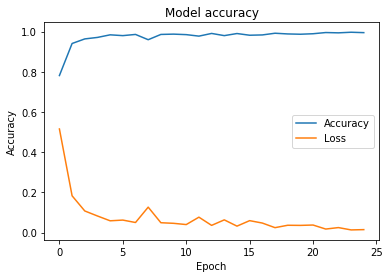

In [35]:
import matplotlib.pyplot as plt

plt.plot(hist.history["accuracy"])
#plt.plot(hist.history['val_accuracy'])

plt.plot(hist.history['loss'])
#plt.plot(hist.history['val_loss'])

plt.title("Model accuracy")
#sets the title of the plot as "Model accuracy".

plt.ylabel("Accuracy")
#sets the y-axis label as "Accuracy"

plt.xlabel("Epoch")
#sets the x-axis label as "Epoch".

plt.legend(["Accuracy","Loss"])
#sets the legend of the plot as "Accuracy" and "Loss".
plt.show()

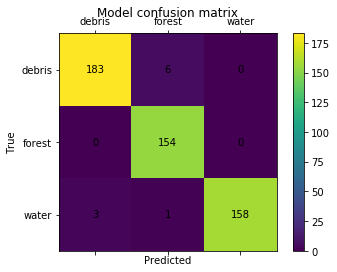

Accuracy : 98.02%


In [36]:
from numpy import argmax
from sklearn.metrics import confusion_matrix, accuracy_score

# Predict labels for the test set using the trained model
pred = model.predict(testX)
predictions = argmax(pred, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(testY, predictions)

# Display the confusion matrix as a heatmap
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Model confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + categories)
ax.set_yticklabels([''] + categories)

# Add the count of each predicted label to the heatmap
for i in range(3):
    for j in range(3):
        ax.text(i, j, cm[j, i], va='center', ha='center')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Calculate the accuracy of the model on the test set
accuracy = accuracy_score(testY, predictions)
print("Accuracy : %.2f%%" % (accuracy*100.0))


Prediction : forest


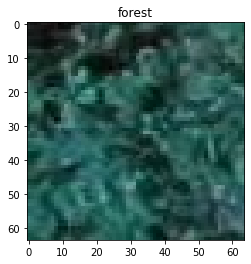

In [33]:
# Load the test image
test_data=[]
test_image_o = cv2.imread("D:/wangyanning/geodata/Data and preprocessing jupyternotebook-20221205/BBKI_drone_debris_detection/BBKI_drone_debris_detection/Ecstall_drone_data/Ecstall_drone_data/tiles(0682)/DJI_0682_128_256.JPG")

# Resize the image to the model's input dimensions
test_image = cv2.resize(test_image_o, (WIDTH, HEIGHT))

# Normalize the pixel values to [0, 1]
test_data.append(test_image)
test_data = np.array(test_image, dtype="float") / 255.0

# Reshape the test data to match the model's input shape
test_data=test_data.reshape([-1,64, 64, 3])

# Predict the class label of the test image using the trained model
pred = model.predict(test_data)
predictions = argmax(pred, axis=1)

# Print the predicted class label
print ('Prediction : '+categories[predictions[0]])

# Display the test image with the predicted class label as the title
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
plt.title(categories[predictions[0]])
plt.imshow(test_image_o)


Prediction : water


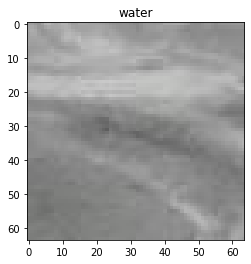

In [34]:
test_data=[]
test_image_o = cv2.imread('D:/wangyanning/geodata/Data and preprocessing jupyternotebook-20221205/BBKI_drone_debris_detection/BBKI_drone_debris_detection/Ecstall_drone_data/Ecstall_drone_data/tiles(0682)/DJI_0682_0_768.JPG')
# read the test image using OpenCV and store in test_image_o variable
test_image = cv2.resize(test_image_o, (WIDTH, HEIGHT))
# resize the test image to the input shape of the model
test_data.append(test_image)
# append the resized image to the test_data list

test_data = np.array(test_image, dtype="float") / 255.0
# convert the test image to a numpy array of floats and scale the pixel values to between 0 and 1
test_data=test_data.reshape([-1,64, 64, 3])
# reshape the test data to the input shape of the model

pred = model.predict(test_data)
# use the trained model to make predictions on the test data
predictions = argmax(pred, axis=1)
# determine the class labels for the predictions by taking the argmax of the predicted probabilities

print ('Prediction : '+categories[predictions[0]])
# print the predicted class label

fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
# create a new figure object and set its background color to white
plt.title(categories[predictions[0]])
# set the title of the plot to the predicted class label
plt.imshow(test_image_o)
# display the test image


In [47]:
# The saved weights can be loaded later to recreate the same model and perform additional training or make predictions on new data.
model.save_weights('model_weights.h5')

In [48]:
#This will save the entire model (architecture, weights, and optimizer state) in the HDF5 format with the file name my_model.h5 in the D:/wangyanning/biggeodata/ directory.
model.save('D:/wangyanning/biggeodata')

INFO:tensorflow:Assets written to: D:/wangyanning/biggeodata\assets
